In [1]:
import numpy as np
import torch
from xitorch import LinearOperator
from xitorch.linalg import symeig

torch.set_default_dtype(torch.float64)
N = 2
t = torch.Tensor([np.pi / 3]).requires_grad_()


class LO(LinearOperator):
    def __init__(self, t):
        super().__init__(shape=(N, N), is_hermitian=True, dtype=torch.float64)
        self.A = torch.cat(
            [torch.cos(t), torch.sin(t), torch.sin(t), -torch.cos(t)]).reshape(2, 2)

    def _mv(self, x: torch.Tensor):
        return torch.tensordot(self.A, x, dims=((-1,), (-1,))).reshape(*x.shape[:-1], -1)

    def _getparamnames(self, prefix: str = ""):
        return [prefix+"A"]


def eigh(t):
    H = LO(t)
    E, W = symeig(H, 1, method='davidson')
    return E[0]


torch.autograd.grad(eigh(t), t, create_graph=True)


(tensor([-8.3267e-17], grad_fn=<AddBackward0>),)

In [2]:
class LO(LinearOperator):
    def __init__(self, t):
        super().__init__(shape=(N, N), is_hermitian=True, dtype=torch.float64)
        self.A = torch.cat(
            [torch.zeros_like(t), torch.sin(t), torch.sin(t), -torch.zeros_like(t)]).reshape(2, 2)

    def _mv(self, x: torch.Tensor):
        return torch.tensordot(self.A, x, dims=((-1,), (-1,))).reshape(*x.shape[:-1], -1)

    def _getparamnames(self, prefix: str = ""):
        return [prefix+"A"]


def eigh(t):
    H = LO(t)
    E, W = symeig(H, 1, method='davidson')
    return E[0]


torch.autograd.grad(eigh(t), t, create_graph=True)

(tensor([-0.5000], grad_fn=<AddBackward0>),)

In [3]:
N = 4


class LO(LinearOperator):
    def __init__(self, t):
        super().__init__(shape=(N, N), is_hermitian=True, dtype=torch.float64)
        self.A = torch.diag(torch.cat(
            [torch.zeros_like(t), torch.sin(t), -torch.sin(t), torch.zeros_like(t)]))

    def _mv(self, x: torch.Tensor):
        return torch.tensordot(self.A, x, dims=((-1,), (-1,))).reshape(*x.shape[:-1], -1)

    def _getparamnames(self, prefix: str = ""):
        return [prefix+"A"]


def eigh(t):
    H = LO(t)
    E, W = symeig(H, 1, method='davidson')
    return E[0]


torch.autograd.grad(eigh(t), t, create_graph=True)


(tensor([-0.5000], grad_fn=<AddBackward0>),)

This is correct.

In [1]:
import numpy as np
import torch
from Hubbard.core import *
import matplotlib.pyplot as plt

np.set_printoptions(precision=10)

N = 5
d = 1
R0 = np.array([3, 3, 7.2])
dvr = MLWF(N, R0=R0,
           lattice=np.array([3, 1], dtype=int),
           band=1,
           dim=d,
           sparse=True,
           shape='square',
           lattice_symmetry=True,
           symmetry=True)
E, W, p = dvr.eigen_basis()


DVR: dx=[0.6]w is set.
DVR: n=[5] is set.
DVR: R0=[3.]w is set.
['x']-reflection symmetry is used.
param_set: trap parameter V0=104.52kHz w=1000nm
lattice: lattice shape is square; lattice constants set to: (1520, 1690)
lattice: lattice shape is square
lattice: Full lattice sizes: [3 1]
lattice: lattice constants: (1520, 1690)w
lattice: dx fixed to: [0.6]w
DVR: dx=[0.6]w is set.
DVR: n=[7] is set.
DVR: R0=[4.52]w is set.
H_op: n=[7] dx=[0.6]w p=[1] Gaussian sparse diagonalization starts. Lowest 4 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.00s.
H_solver: eigenstates memory usage:  0.00 MiB.
H_op: n=[7] dx=[0.6]w p=[-1] Gaussian sparse diagonalization starts. Lowest 4 states are to be calculated.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.00s.
H_solver: eigenstates memory usage:  0.00 MiB.
Wannier WARNING: band gap is smaller than band width.


In [2]:
E[0]

array([-0.9573700631, -0.8392848174, -0.839056035 ])

In [3]:
W[0]

[array([[[-9.8585774428e-01]],
 
        [[-1.6154757075e-01]],
 
        [[ 4.1953467341e-02]],
 
        [[-1.4843517348e-02]],
 
        [[ 1.8716510074e-03]],
 
        [[-1.2585138366e-03]],
 
        [[ 9.2595994545e-04]],
 
        [[-7.2294778487e-04]]]),
 array([[[-1.1257494617e-01]],
 
        [[-7.8128729383e-01]],
 
        [[-6.1330893156e-01]],
 
        [[-2.7614563053e-02]],
 
        [[ 2.4125651159e-03]],
 
        [[-8.2049666815e-04]],
 
        [[ 3.7775260432e-04]]]),
 array([[[-4.0740890176e-03]],
 
        [[-1.1948308540e-01]],
 
        [[-7.7419528451e-01]],
 
        [[-6.2093400248e-01]],
 
        [[-2.7646885314e-02]],
 
        [[ 2.2293400186e-03]],
 
        [[-6.6299356451e-04]],
 
        [[ 2.4562322977e-04]]])]

```python
tensor([-0.9573700631, -0.8392848174, -0.8390560350], grad_fn=<SliceBackward0>)

[tensor([[[-9.8585774428e-01]],
 
         [[-1.6154757075e-01]],
 
         [[ 4.1953467341e-02]],
 
         [[-1.4843517348e-02]],
 
         [[ 1.8716510074e-03]],
 
         [[-1.2585138366e-03]],
 
         [[ 9.2595994545e-04]],
 
         [[-7.2294778490e-04]]], grad_fn=<ReshapeAliasBackward0>),
 tensor([[[-1.1257494617e-01]],
 
         [[-7.8128729383e-01]],
 
         [[-6.1330893156e-01]],
 
         [[-2.7614563053e-02]],
 
         [[ 2.4125651159e-03]],
 
         [[-8.2049666815e-04]],
 
         [[ 3.7775260432e-04]]], grad_fn=<ReshapeAliasBackward0>),
 tensor([[[-4.0740890176e-03]],
 
         [[-1.1948308540e-01]],
 
         [[-7.7419528451e-01]],
 
         [[-6.2093400248e-01]],
 
         [[-2.7646885314e-02]],
 
         [[ 2.2293400187e-03]],
 
         [[-6.6299356446e-04]],
 
         [[ 2.4562322995e-04]]], grad_fn=<ReshapeAliasBackward0>)]
```

Results match.

In [2]:
import numpy as np
import torch
from Hubbard.equalizer import *
import matplotlib.pyplot as plt

np.set_printoptions(precision=10)
N = 20
d = 1
R0 = np.array([3, 3, 7.2])
dvr = HubbardEqualizer(N,
                       R0=R0,
                       lattice=np.array([4, 1], dtype=int),
                       band=1,
                       lc=(1550,),
                       dim=d,
                       avg=1/2,
                       sparse=True,
                       shape='square',
                       lattice_symmetry=True,
                       symmetry=True,
                       waist=None,
                       equalize=False,
                       verbosity=3)
eig_sol = dvr.eigen_basis()
dvr.singleband_Hubbard(u=True, eig_sol=eig_sol)
print(f'V = {np.diag(dvr.A)}')
print(f't = {abs(dvr.nn_tunneling(dvr.A))}')
print(f'U = {dvr.U}')


DVR: dx=[0.15]w is set.
DVR: n=[20] is set.
DVR: R0=[3.]w is set.
['x']-reflection symmetry is used.
param_set: trap parameter V0=52.26kHz w=1000nm
lattice: lattice shape is square; lattice constants set to: (1550, 1550)
lattice: lattice shape is square
lattice: Full lattice sizes: [4 1]
lattice: lattice constants: (1550, 1550)w
lattice: dx fixed to: [0.15]w
DVR: dx=[0.15]w is set.
DVR: n=[35] is set.
DVR: R0=[5.325]w is set.
Equalize: scale_factor is not a number. Set to None.
H_op: n=[35] dx=[0.15]w p=[1] Gaussian sparse diagonalization starts. Lowest 5 states are to be calculated.
H_op: n=[35] dx=[0.15]w p=[1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.00s.
H_solver: eigenstates memory usage:  0.00 MiB.
H_op: n=[35] dx=[0.15]w p=[-1] Gaussian sparse diagonalization starts. Lowest 5 states are to be calculated.
H_op: n=[35] dx=[0.15]w p=[-1] Gaussian operator constructed.
H_solver: diagonalize spa

```python
V = tensor([ 0.4405899279, -0.4405899279, -0.4405899279,  0.4405899279],
         grad_fn=<DiagBackward0>)
t = tensor([0.1864505458, 0.1632263053, 0.1864505458], grad_fn=<AbsBackward0>)
U = tensor([2.3316572143, 2.2338826170, 2.2338826170, 2.3316572143],
         grad_fn=<MulBackward0>)
```

Everyting matches well.

In [1]:
import numpy as np
import torch
from Hubbard.equalizer import *
import matplotlib.pyplot as plt

N = 20
d = 1
R0 = np.array([3, 3, 7.2])
dvr = HubbardEqualizer(N,
                       R0=R0,
                       lattice=np.array([4, 1], dtype=int),
                       band=1,
                       lc=(1550,),
                       dim=d,
                       avg=1/2,
                       sparse=True,
                       shape='square',
                       lattice_symmetry=True,
                       symmetry=True,
                       waist=None,
                       equalize=False,
                       eqmethod='trf',
                       verbosity=3)
res = dvr.equalize('vT')

DVR: dx=[0.15]w is set.
DVR: n=[20] is set.
DVR: R0=[3.]w is set.
['x']-reflection symmetry is used.
param_set: trap parameter V0=52.26kHz w=1000nm
lattice: lattice shape is square; lattice constants set to: (1550, 1550)
lattice: lattice shape is square
lattice: Full lattice sizes: [4 1]
lattice: lattice constants: (1550, 1550)w
lattice: dx fixed to: [0.15]w
DVR: dx=[0.15]w is set.
DVR: n=[35] is set.
DVR: R0=[5.325]w is set.
Equalize: scale_factor is not a number. Set to None.
Equalize: varying waist direction = None.
Equalize: method = trf
Equalize: quantities = vT

H_op: n=[35] dx=[0.15]w p=[1] Gaussian sparse diagonalization starts. Lowest 5 states are to be calculated.
H_op: n=[35] dx=[0.15]w p=[1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.00s.
H_solver: eigenstates memory usage:  0.00 MiB.
H_op: n=[35] dx=[0.15]w p=[-1] Gaussian sparse diagonalization starts. Lowest 5 states are to be calcula

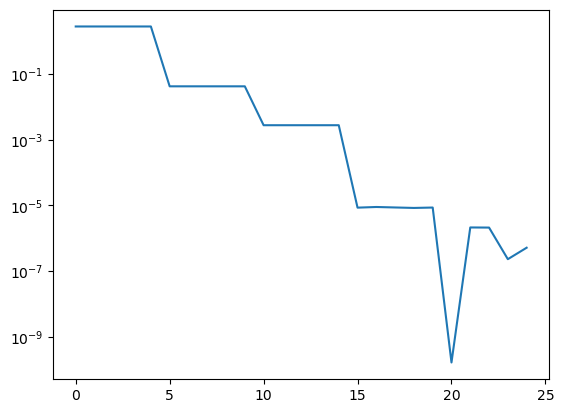

In [2]:
import matplotlib.pyplot as plt

plt.plot(res[3]['fval'])
plt.yscale('log')

/Users/nottforestfc/mambaforge/lib/python3.10/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /Users/runner/miniforge3/conda-bld/pytorch-recipe_1664817728005/work/aten/src/ATen/native/TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


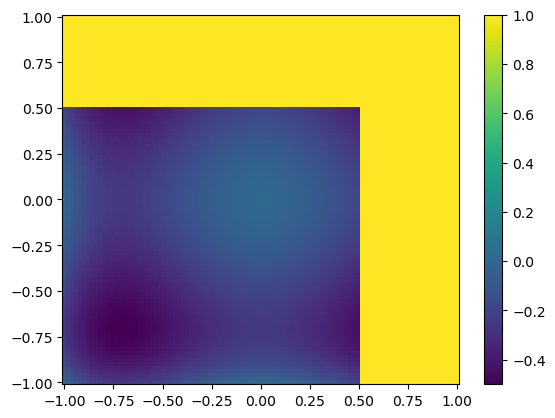

In [1]:
import matplotlib.pyplot as plt
import torch as th


def cost(x):
    c = th.sum(-x**2 + x**4, axis=-1)
    c[th.sum(x > 0.5, axis=-1).bool()] = 1e5
    return c


x = th.linspace(-1, 1, 100)
y = th.linspace(-1, 1, 100)
X = th.meshgrid(x, y)
X0 = th.stack(X, dim=-1)
plt.pcolormesh(*X, cost(X0), vmin=-0.5, vmax=1)
plt.colorbar()

In [1]:
import torch as th
from Hubbard.optimize import minimize
import numpy as np


def cost(x):
    c = th.sum(-x**2 + x**4, axis=-1)
    c[th.sum(x > 0.5, axis=-1).bool()] = 1e5
    return c


lrs = {'name': 'step', 'args': {'step_size': 100, 'gamma': 0.5}}
res = minimize(cost, th.Tensor([0.1, -0.1]),
               method='sgd', params={'momentum': 1e-1}, maxiter=1000, verbosity=2)
res.x


Optimizing with sgd...
Iter   1: cost = -0.01980000 df = -inf grad = 0.27718589
x = tensor([ 0.1000, -0.1000])
dx = tensor([-inf, -inf])

Iter   2: cost = -0.02199808 df = -0.00219808 grad = 0.29162493
x = tensor([ 0.1008, -0.1100])
dx = tensor([ 0.0008, -0.0100])

Iter   3: cost = -0.02450436 df = -0.00250629 grad = 0.30722028
x = tensor([ 0.1108, -0.1120])
dx = tensor([ 0.0100, -0.0020])

Iter   4: cost = -0.02792341 df = -0.00341904 grad = 0.32706311
x = tensor([ 0.1197, -0.1184])
dx = tensor([ 0.0089, -0.0064])

Iter   5: cost = -0.03164861 df = -0.00372520 grad = 0.34715539
x = tensor([ 0.1282, -0.1254])
dx = tensor([ 0.0085, -0.0071])

Iter   6: cost = -0.03509455 df = -0.00344595 grad = 0.36449230
x = tensor([ 0.1388, -0.1284])
dx = tensor([ 0.0106, -0.0029])

Iter   7: cost = -0.03920072 df = -0.00410616 grad = 0.38391539
x = tensor([ 0.1474, -0.1352])
dx = tensor([ 0.0086, -0.0069])

Iter   8: cost = -0.04346422 df = -0.00426351 grad = 0.40287197
x = tensor([ 0.1538, -0.1442])

Parameter containing:
tensor([ 0.5000, -0.5302], requires_grad=True)